In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# loading data into X,Y
X = load_boston().data
Y = load_boston().target

In [3]:
#splitting data into X_train and X_test
import sklearn
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [8]:
#standardizing the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
#clf = SGDRegressor(loss='squared_loss')
#clf.fit(X, Y)
#print(mean_squared_error(Y, clf.predict(X)))

In [12]:
#Applying SGD regressor on Train data
clf = SGDRegressor(loss='squared_loss')
clf.fit(X_train, Y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

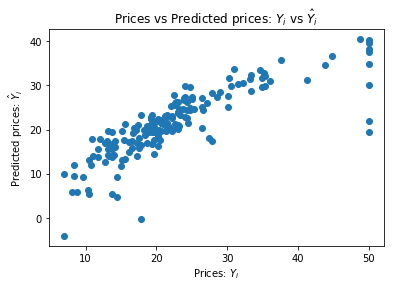

In [13]:

clf.fit(X_train, Y_train)
#Finding the predicted prices
Y_pred_clf = clf.predict(X_test)

#plotting a chart of actual prices vs predicted prices for SGD regressor
plt.scatter(Y_test, Y_pred_clf)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

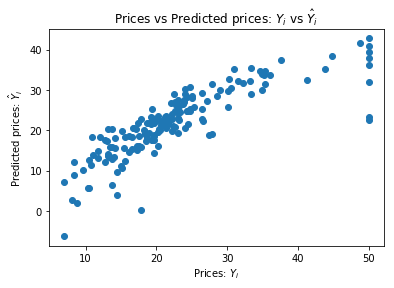

In [14]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

#Finding the predicted price
Y_pred_lm = lm.predict(X_test)

#plotting a chart of actual prices vs predicted prices for linear regression
plt.scatter(Y_test, Y_pred_lm)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [15]:
#Finding weight vector of SGD
clf.coef_

array([-0.81363518,  0.40405972, -0.51748626,  0.29339603, -0.22368237,
        3.14507661, -0.42221585, -1.68006996,  0.74576312, -0.52451597,
       -1.77986047,  0.87611157, -2.98815837])

In [16]:
#Finding weight vector of linear regression
lm.coef_

array([-1.31193031,  0.86187745, -0.16719287,  0.18957843, -1.48658584,
        2.79131565, -0.32737703, -2.77204093,  2.97567549, -2.2727549 ,
       -2.13375869,  1.05842993, -3.33495407])

In [17]:
#https://stackoverflow.com/questions/41140647/python-printing-lists-with-tabulate


#Tabulating and comparing SGD and Linear regression weights
from tabulate import tabulate
headers = ['SGD Weights','Linear regression weigths']    


table = zip(clf.coef_,lm.coef_)
print(tabulate(table, headers=headers, floatfmt=".4f"))

  SGD Weights    Linear regression weigths
-------------  ---------------------------
      -0.8136                      -1.3119
       0.4041                       0.8619
      -0.5175                      -0.1672
       0.2934                       0.1896
      -0.2237                      -1.4866
       3.1451                       2.7913
      -0.4222                      -0.3274
      -1.6801                      -2.7720
       0.7458                       2.9757
      -0.5245                      -2.2728
      -1.7799                      -2.1338
       0.8761                       1.0584
      -2.9882                      -3.3350


In [18]:
clf.fit(X_train, Y_train)
print(mean_squared_error(Y_train, clf.predict(X_train)))

21.39072011815044


In [19]:
lm.fit(X_train, Y_train)
print(mean_squared_error(Y_train, lm.predict(X_train)))

19.54675847353467


In [20]:
#calculating mean squared errors of both models
a=(Y_test-clf.predict(X_test))
b=(Y_test-lm.predict(X_test))

a=a**2
b=b**2

In [21]:
  #comparing MSE of SGD regressor and linear regression 
from tabulate import tabulate
headers = ['SGD MSE','Linear regression MSE']    


table = zip(a,b)
print(tabulate(table, headers=headers, floatfmt=".4f"))

  SGD MSE    Linear regression MSE
---------  -----------------------
   0.6603                   0.0176
   1.0227                  12.1909
  16.9378                  20.4322
 100.6309                  53.7519
   3.8395                   2.4659
  38.3353                  22.3665
   8.0225                   9.8563
   0.0056                   0.8594
  13.7791                  12.6495
   8.6762                   0.5588
   0.6498                   0.9899
   4.7137                   7.7641
   5.0103                   9.6807
  19.3146                   6.2054
   5.5706                  15.1025
   0.6116                   4.2494
 410.3948                 309.7293
   0.0879                   0.7770
  30.9380                  27.3459
  28.5613                  15.1458
  13.6688                  29.2147
  13.4311                  14.3116
  50.4955                  40.8117
   0.9498                   1.6113
   0.0909                   0.3423
   0.2017                   0.3870
   2.1558           

# Conclusions

1.Mean sqaured error of SGD regressor is higher than that of linear regression

2.Most of the SGD weights are higher than that of linear model's weights